In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [17]:
sales = pd.read_csv("/content/advertising.csv")
print(sales.shape)
print(sales.head(10))

(200, 4)
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
5    8.7   48.9       75.0    7.2
6   57.5   32.8       23.5   11.8
7  120.2   19.6       11.6   13.2
8    8.6    2.1        1.0    4.8
9  199.8    2.6       21.2   15.6


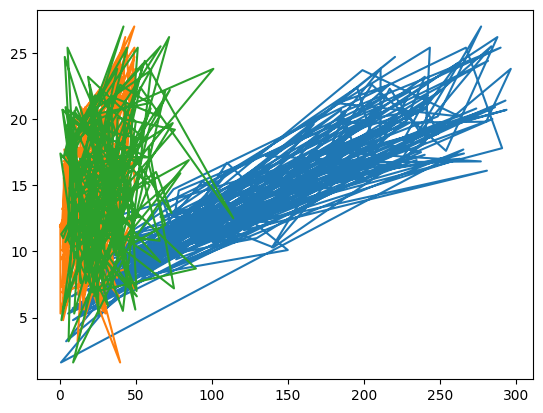

In [18]:
plt.plot(sales['TV'],sales['Sales'])
plt.plot(sales['Radio'],sales['Sales'])
plt.plot(sales['Newspaper'],sales['Sales'])
plt.show()

In [19]:
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [20]:
X=sales.iloc[:,:-1]
y=sales.iloc[:,-1]

print(X)
print(y)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]
0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [23]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X=sc.fit_transform(X)
print(X)

[[ 9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01]
 [ 5.64664612e-01  1.65000572e+00  1.02862691e+00]
 [-9.25304978e-01  9.00494200e-01  3.84117072e+00]
 [ 1.56887609e+00  1.10306488e+00  1.16211917e+00]
 [-9.08957349e-01 -1.86635121e-01 -5.64073843e-01]
 [ 3.00679600e-03  4.29449843e-

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train)
print(X_test)

[[-3.62479475e-01 -1.05093669e+00 -3.43121138e-01]
 [ 3.49810063e-01 -9.42898996e-01 -1.11185242e+00]
 [-1.21372386e+00  2.32010953e-01  2.09260624e-01]
 [-9.89527805e-01 -7.20071247e-01 -5.64073843e-01]
 [ 8.98623313e-01 -1.40881156e+00 -6.88359740e-01]
 [-1.27094056e+00 -1.32103093e+00 -7.71217005e-01]
 [-8.92609721e-01 -4.90491142e-01  4.71641962e-01]
 [ 3.00679600e-03  4.29449843e-02 -5.27248393e-01]
 [-4.95595880e-01 -1.18598381e+00  1.77038355e-01]
 [-8.26051518e-01  2.86029801e-01 -6.69947015e-01]
 [-8.03865450e-01  1.58923451e+00  1.81641536e-01]
 [ 2.49388915e-01 -1.09145083e+00 -8.17248818e-01]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [-1.62591764e+00  1.05579839e+00  9.22753735e-01]
 [-8.24883830e-01 -1.51684926e+00 -7.25185191e-01]
 [-2.06009314e-01 -1.18598381e+00  3.43397329e-02]
 [-8.59914463e-01 -4.22967582e-01 -8.12645637e-01]
 [ 1.66579418e+00  1.28537849e+00  9.50372823e-01]
 [-1.48813048e+00 -2.13644545e-01 -6.23915201e-01]
 [ 5.90353742e-01 -1.33453565e+

In [25]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
lr_pred=lr.predict(X_test)
print(r2_score(y_test,lr_pred))

0.9059011844150825


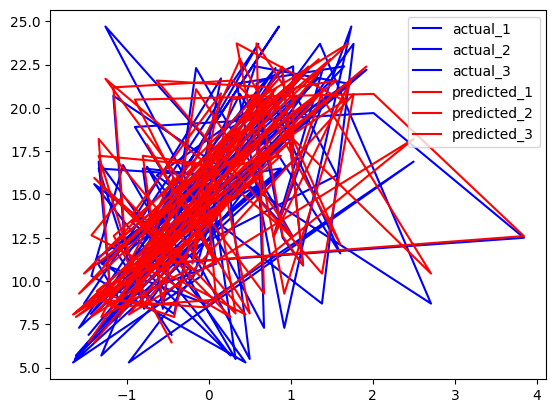

In [42]:
plt.plot(X_test,y_test,label=['actual_1','actual_2','actual_3'],color='blue')
plt.plot(X_test,lr_pred,label=['predicted_1','predicted_2','predicted_3'],color='red')
plt.legend()
plt.show()

In [28]:
from xgboost.sklearn import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
xgb_pred=xgb.predict(X_test)
print(r2_score(y_test,xgb_pred))

0.953029858014247


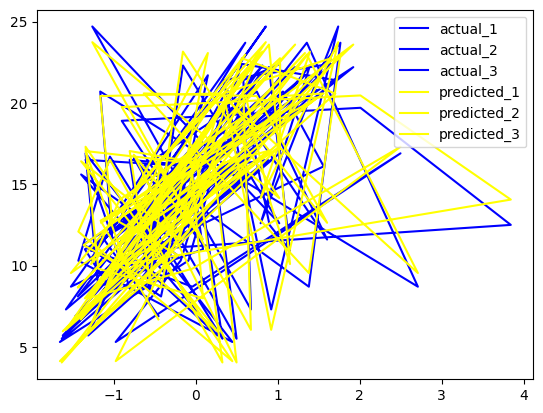

In [43]:
plt.plot(X_test,y_test,label=['actual_1','actual_2','actual_3'],color='blue')
plt.plot(X_test,xgb_pred,label=['predicted_1','predicted_2','predicted_3'],color='yellow')
plt.legend()
plt.show()

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [45]:
gbr_pred=gbr.predict(X_test)
print(r2_score(y_test,gbr_pred))

0.9592890766784282


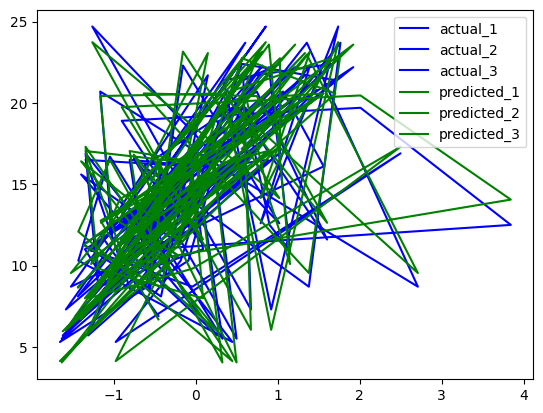

In [46]:
plt.plot(X_test,y_test,label=['actual_1','actual_2','actual_3'],color='blue')
plt.plot(X_test,xgb_pred,label=['predicted_1','predicted_2','predicted_3'],color='green')
plt.legend()
plt.show()